# DM5 : Modèle de Hopfield
---

Dans le cours no. 5 et le TD associé, nous avons étudié le modèle de Hopfield : C'est un modèle simplifié pour expliquer comment des motifs (mémoires) peuvent être stockés dans les connexions synaptiques et être récupérés par la dynamique du réseau. C'est l'archétype d'un réseau attracteur, dont le mécanisme sousjacent a par la suite également été démontré fonctionner avec des modèles de réseau plus compliqué (réseau à spike, modèles de taux de décharge etc.). 

Dans ce devoir, nous allons étudier davantage le modèle de Hopfield. Veuillez vous référer aux diapos du cours et les équations dans le notebook du TD associé pour la définition précise du modèle.


In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Valeur critique de $\beta$

Dans le TD, nous avons simulé l'évolution d'un réseau dont les poids synaptiques étaient choisis pour encoder un smiley. Pour une valeur de $\beta$ suffisamment grande ($\beta \ge 4$ dans le cas étudié), le réseau a évolué dans le sens souhaité, c'est-à-dire a réproduit petit à petit le motif stocké. Pour des valeurs de $\beta$ plus petites ($\beta=1$ dans le TD), le motif n'a pas été récupéré. 

Déterminez plus précisément la valeur critique au-dessus laquelle le motif est récupéré, en faisant varier systématiquement $\beta$ entre 1 et 4, avec une précision attendue  de l'ordre de 0.2 (un cinquième), en partant d'un overlap initial modéré (env. 1/10 des pixels identique au motif, le reste choisi aléatoirement). 

**Indice :** Plottez l'évolution de l'overlap $m$ dans le temps pour chaque valeur de $\beta$ testée. Si l'overlap semble stationnaire (ne change plus de manière significative après un temps donné), prenez la valeur finale de l'overlap pour chaque valeur de $\beta$ et plottez ces valeurs finales en fonction de $\beta$.

In [2]:
# define some useful functions you can use below
# ----------------------------------------------

# gain function
def g(h, beta):
    """Gain function: probability of a neuron to be 
    in the active state given the input h, for a 
    given value of beta (default value 1)."""
    return 1/(1+np.exp(-beta*h))


# overlap between a given pattern and a state
def overlap(state, pattern):
    return sum(state*pattern)/N


# a plot function to easily plot the 
# network state as an image
def plot_state(state):
    plt.imshow(state.reshape((nx,ny)), cmap='Greys_r')

In [3]:
# import an image that we will use as first motif
img = np.loadtxt('smiley.dat')
nx, ny = img.shape

# create our Hopfield net
# -----------------------

# convert the 2D pixel matrix to a 1D pattern vector
P0 = img.flatten()

# the network size is given by the length of the pattern
N = len(P0)

# for a single pattern, the weight matrix is given by
W = P0[:,None] * P0[None,:] / N

# enforce empty diagonal (no self-connections)
W[np.arange(N),np.arange(N)] = 0

In [4]:
# beta values to probe
betas = np.arange(1,4.2,0.2)
nb = len(betas)

# choose a larger number of time steps
nt = 20

# array with overlap values
m = np.zeros((nb,nt))

for j, beta in enumerate(betas):
    # create state array for all times
    S = np.ones((nt,N))

    # noisy initial state
    # NOTE: values must be either -1 or 1
    S[0] = 2*np.round(np.random.uniform(size=N)) - 1

    # add partial overlap to the initial state 
    # (10% -> ~ 400 pixel)
    S[0,:400] = P0[:400]
    
    # initial overlap
    m[j,0] = overlap(S[0],P0)
    
    # loop over times
    for i in range(nt-1):
        # calculer les courants
        h = W.dot(S[i])
        # déterminer les probabilités
        p = g(h,beta)
        # échantilloner des activités
        is_up = np.random.random(N) < p
        # transformer en +1, -1
        S[i+1] = 2*is_up - 1
        
        # calculate and store new overlap
        m[j,i+1] = overlap(S[i+1],P0)
        

Text(0, 0.5, 'overlap')

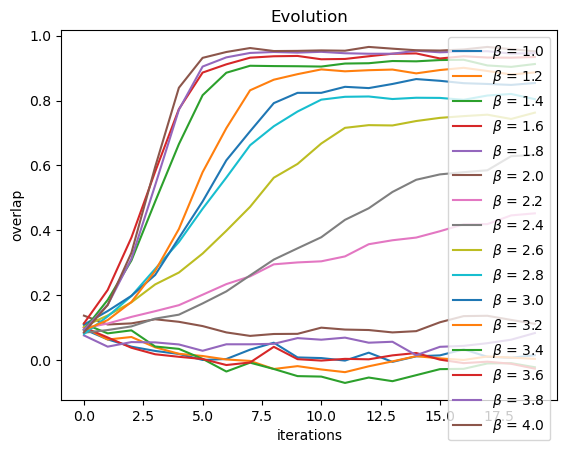

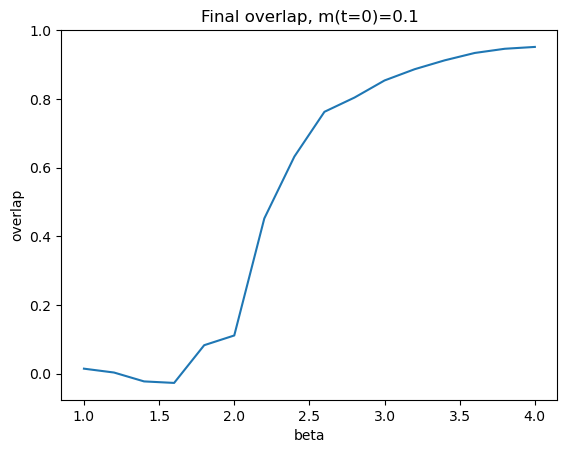

In [5]:
# plot overlap over time

fig, ax = plt.subplots()
ax.set_title('Evolution')
for j, beta in enumerate(betas):
    ax.plot(np.arange(nt), m[j], label=r'$\beta$ = %.1f'%beta)
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('overlap')


# plot final value as a function of beta

fig, ax = plt.subplots()
ax.set_title('Final overlap, m(t=0)=0.1')
ax.plot(betas, m[:,-1])
ax.set_xlabel('beta')
ax.set_ylabel('overlap')





Répétez en commençant avec un overlap parfait, $m(t=0)=1$, c'est-à-dire avec le motif sans modification. Qu'est-ce que vous observez ?

In [6]:
# array with overlap values
m2 = np.zeros((nb,nt))

for j, beta in enumerate(betas):
    # create state array for all times
    S = np.ones((nt,N))

    # perfect overlap at initial state
    S[0] = P0
    
    # initial overlap
    m2[j,0] = overlap(S[0],P0)
    
    # loop over times
    for i in range(nt-1):
        # calculer les courants
        h = W.dot(S[i])
        # déterminer les probabilités
        p = g(h,beta)
        # échantilloner des activités
        is_up = np.random.random(N) < p
        # transformer en +1, -1
        S[i+1] = 2*is_up - 1
        
        # calculate and store new overlap
        m2[j,i+1] = overlap(S[i+1],P0)
        

Text(0, 0.5, 'overlap')

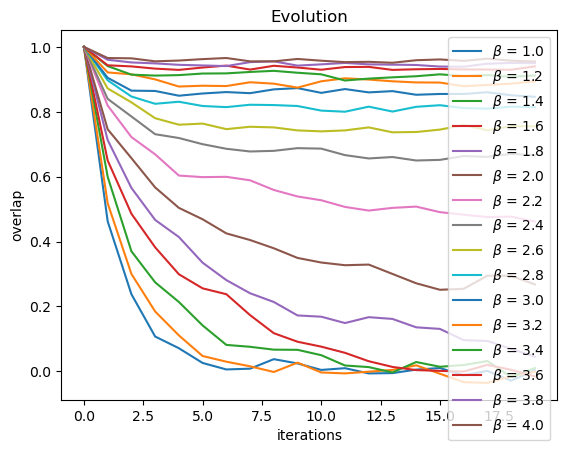

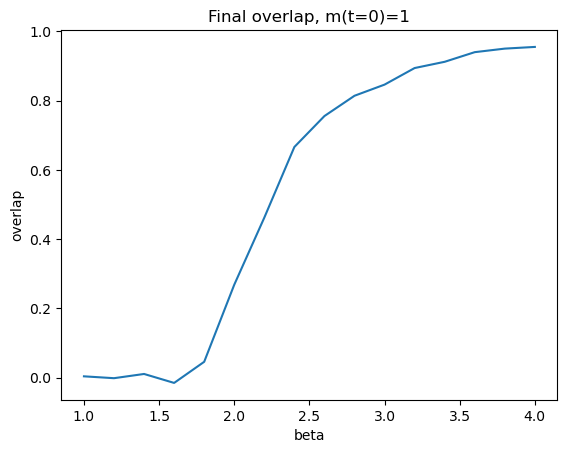

In [7]:
# plot overlap over time

fig, ax = plt.subplots()
ax.set_title('Evolution')
for j, beta in enumerate(betas):
    ax.plot(np.arange(nt), m2[j], label=r'$\beta$ = %.1f'%beta)
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('overlap')


# plot final value as a function of beta

fig, ax = plt.subplots()
ax.set_title('Final overlap, m(t=0)=1')
ax.plot(betas, m2[:,-1])
ax.set_xlabel('beta')
ax.set_ylabel('overlap')

Text(0, 0.5, 'overlap')

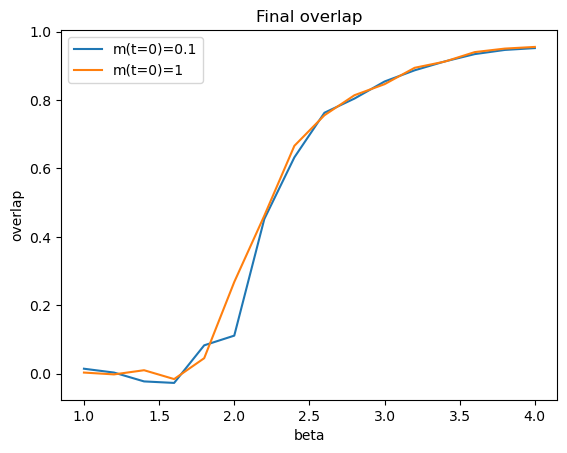

In [8]:
# plot final value as a function of beta,
# compared for both initial conditions

fig, ax = plt.subplots()
ax.set_title('Final overlap')
ax.plot(betas, m[:,-1], label='m(t=0)=0.1')
ax.plot(betas, m2[:,-1], label='m(t=0)=1')
ax.legend()
ax.set_xlabel('beta')
ax.set_ylabel('overlap')

#### Théorie pour l'overlap stationnaire $m^*$ en fonction de $\beta$

Pour $m>0$, les $S_i$ auront tendance à s'aligner sur les $P_i$, indépendamment de leur valeur précédante. Si l'overlap augmente ou diminue dépend de la valeur de $m$, et du paramètre $\beta$, mais en moyenne il ne pourra pas changer de signe. Est-ce qu'on peut calculer la valeur stationnaire (finale) que l'overlap va atteindre ?

Pour rappel, l'overlap $m$ avec un motif $P_i, i=1,...,N$ est donné par $m(t) = \frac{1}{N}\sum_i S_i(t) P_i$. On peut calculer l'overlap stationnaire $m^*$ (qui ne dépend plus du temps) si l'on suppose que cet overlap est donné approximativement par
$$m^*= \langle \frac{1}{N}\sum_i S_i P_i\rangle,$$
où $\langle\cdot\rangle$ dénote la moyenne sur les $S_i$ réalisés dans l'état stationnaire. Dans la mesure que $m^*$ décrit en effet l'overlap moyen, la probabilité d'observer $S_i=1$ ou $S_i=-1$ dépend elle-même de $m^*$ selon 
$$p(S_i = 1) = g( P_i m^*) = \frac{1}{1+e^{-\beta P_im^*}}.$$
On trouve donc
$$\begin{align}
m^*&=\frac{1}{N}\sum_i [p(S_i=1) P_i - p(S_i=-1) P_i] \\
&= \frac{1}{N}\sum_i [2p(S_i=1) - 1] P_i \\
&= \frac{1}{N}\sum_i \frac{1-e^{-\beta P_i m^*}}{1+e^{-\beta P_i m^*}} P_i \\
&= \tanh(\frac{\beta m^*}{2}).
\end{align}$$
(Le dernier pas demande un peu plus de réfléxion - il faut se convaincre que chaque terme de la somme est égale indépendamment si $P_i=1$ ou $P_i=-1$, ce qui est le cas parce que le préfacteur change également de signe.)

L'équation finale pour $m^*$, 
$$m^*=\tanh(\frac{\beta m^*}{2}),$$
n'a pas de solution simple où directe, mais il est en principe possible de déterminer les solutions numériquement. Ici, nous allons seulement procéder à une analyse graphique des solutions de l'équation pour $m^*$. Plottez $m^*$ ainsi que $\tanh(\frac{\beta m^*}{2})$ en fonction de $m^*$ pour différentes valeurs de $\beta$ sur un même graphe. Les solutions de l'équation correspondent à des points où les courbes pour $m^*$ et $\tanh(\frac{\beta m^*}{2})$ se croisent. Qu'est-ce que vous observez pour la valeur critique de $\beta$ que vous avez déterminée précedemment ?

Text(0, 0.5, 'overlap')

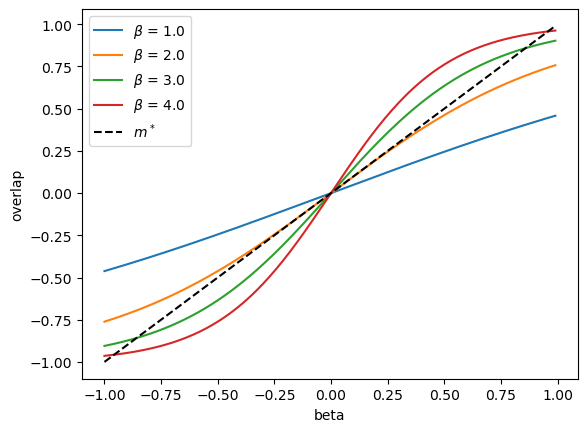

In [9]:
# 
x = np.arange(-1,1, 0.01)

fig, ax = plt.subplots()
for j, beta in enumerate(betas[::5]):
    ax.plot(x, np.tanh(beta*x/2), label=r'$\beta$ = %.1f'%beta)
ax.plot(x, x, 'k--', label='$m^*$')
ax.legend()
ax.set_xlabel('beta')
ax.set_ylabel('overlap')

**Remarque (bonus) :** L'équation pour $m^*$ permet de déterminer la valeur critique de $\beta$ mathématiquement ; est-ce que vous avez une idée comment ?



Quand  $\beta$ atteint la valeur critique, les courbes $m$ et $\tanh(\frac{\beta m}{2})$ commencent à se croiser à des valeurs $m^*>0$. Cela implique que $\tanh(\frac{\beta m}{2})$ croit plus rapidement que $m$ à l'origine, autour de $m=0$. Pour la valeur critique, les dérivées (i.e. les pentes) de $\tanh(\frac{\beta m}{2})$ et de $m$ sont donc égal, ce qui permet de déterminer $\beta$ :

$\frac{d}{dm} \tanh(\frac{\beta m}{2})|_{m=0} \stackrel{!}{=} 1$

Avec $\frac{d}{dm} \tanh(\frac{\beta m}{2})|_{m=0} = \frac{\beta}{2} \frac{d}{dx} \tanh(x)|_{x=0}$ et $\tanh'(0) = 1$ (car $\tanh'(x) = 1/\cosh^2(x)$), on trouve directement $\beta_{crit} = 2$.

### 2. Récupération d'un motif, $K=2$

Dans le cours, nous avons vu que la capacité maximale d'un réseau de Hopfield est $K_c=0.138 N$, ce qui dans notre cas ($N=4096$) suggère que le réseau peut stocker jusqu'à 565 motifs différents. On va faire plus simple et n'en considérer que trois. Choisissez pour $\beta$ une valeur au-dessus de la valeur critique.

Construisez un réseau de Hopfield avec des connexions synaptiques pour stocker les deux motifs `smiley.dat`, `flowers.dat` et `wolf.dat`. Pour cela, créez / définissez d'abord trois arrays P0, P1 et P2 correspondant à chaque motif respectif. Rappelez-vous que la matrice de connectivité et ensuite donnée par l'addition des matrices de connectivité qu'on obtiendrait pour chaque motif individuellement, et que les auto-connexions sont interdites ($W_{ii}=0$).

In [10]:
# For simplicity, here are the two patterns:
P0 = np.loadtxt('smiley.dat').flatten()
P1 = np.loadtxt('flowers.dat').flatten()

# create our Hopfield net
# -----------------------

# convert the 2D pixel matrix to a 1D pattern vector
P0 = img.flatten()

# the network size is given by the length of the pattern
N = len(P0)

# for a single pattern, the weight matrix is given by
W0 = P0[:,None] * P0[None,:] / N

# second pattern
W1 = P1[:,None] * P1[None,:] / N

W = W0 + W1

# enforce empty diagonal (no self-connections)
W[np.arange(N),np.arange(N)] = 0

Maintenant que vous avex créé le réseau, simulez l'évolution pour des conditions initiales différentes, avec un overlap initial différent avec les deux motifs (voir ci-dessous). Pour chaque condition, calculez l'overlap avec chacun des ~~trois~~ **deux** motifs, et plottez comment les overlaps avec les différents motifs évoluent avec le temps (i.e., plottez $m^0(t)$, $m^1(t)$ ~~et $m^3(t)$~~ sur un même graphe).

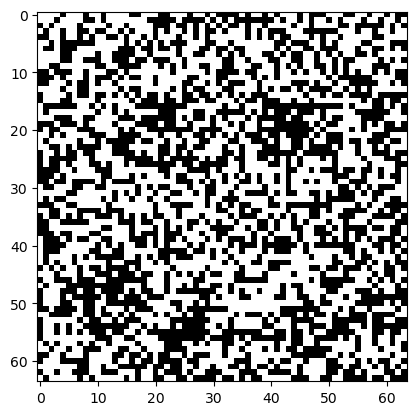

In [11]:
# nombre d'itération, modifiez si nécessaire
nt = 10 

# initialisation de l'array contenant la séquence
# des états du réseau
S = np.zeros((nt,N)) 

# 1) Initial overlap with first pattern only
S[0] = 2*np.round(np.random.uniform(size=N))-1 # clear previous initial condition
nover = 800
inds_over = np.random.choice(N, size=nover, replace=False)
S[0,inds_over] = P0[inds_over] 

plot_state(S[0])


In [12]:
# array with overlap values (two motifs)
m = np.zeros((nt,2))

# initial overlap
m[0,0] = overlap(S[0],P0)
m[0,1] = overlap(S[0],P1)

# loop over times
for i in range(nt-1):
    # calculer les courants
    h = W.dot(S[i])
    # déterminer les probabilités
    p = g(h,beta=5)
    # échantilloner des activités
    is_up = np.random.random(N) < p
    # transformer en +1, -1
    S[i+1] = 2*is_up - 1

    # calculate and store new overlap
    m[i+1,0] = overlap(S[i+1],P0)
    m[i+1,1] = overlap(S[i+1],P1)


Text(0, 0.5, 'overlap')

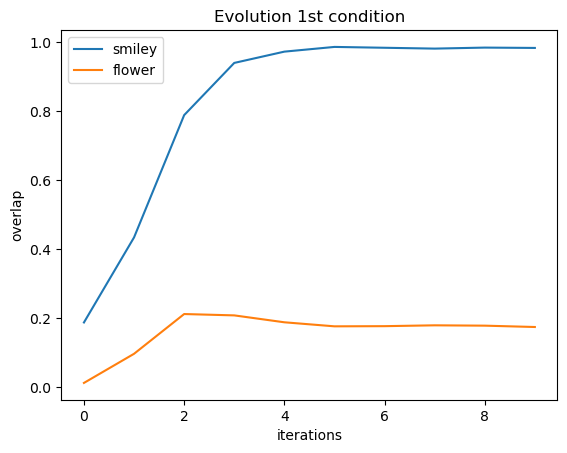

In [13]:
# plot overlap over time

fig, ax = plt.subplots()
ax.set_title('Evolution 1st condition')
ax.plot(np.arange(nt), m[:,0], label='smiley')
ax.plot(np.arange(nt), m[:,1], label='flower')
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('overlap')

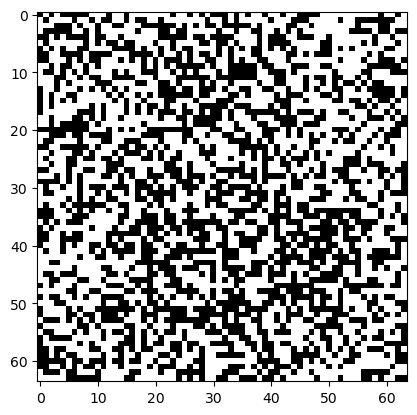

In [14]:
# 2) Initial overlap with second pattern only
S[0] = 2*np.round(np.random.uniform(size=N))-1 # clear previous initial condition
nover = 800
inds_over = np.random.choice(N, size=nover, replace=False)
S[0,inds_over] = P1[inds_over] 

plot_state(S[0])

Text(0, 0.5, 'overlap')

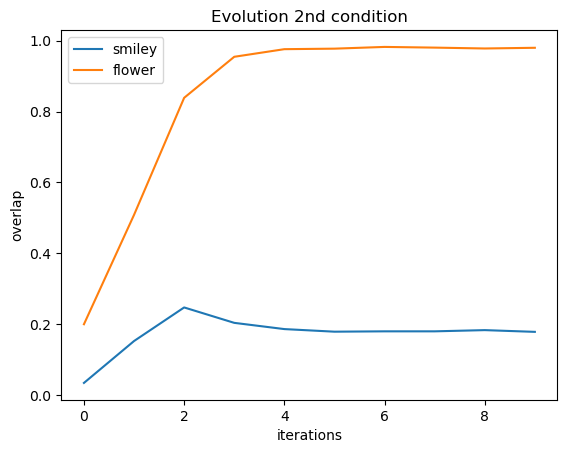

In [15]:
# array with overlap values (two motifs)
m = np.zeros((nt,2))

# initial overlap
m[0,0] = overlap(S[0],P0)
m[0,1] = overlap(S[0],P1)

# loop over times
for i in range(nt-1):
    # calculer les courants
    h = W.dot(S[i])
    # déterminer les probabilités
    p = g(h,beta=5)
    # échantilloner des activités
    is_up = np.random.random(N) < p
    # transformer en +1, -1
    S[i+1] = 2*is_up - 1

    # calculate and store new overlap
    m[i+1,0] = overlap(S[i+1],P0)
    m[i+1,1] = overlap(S[i+1],P1)

# plot overlap over time

fig, ax = plt.subplots()
ax.set_title('Evolution 2nd condition')
ax.plot(np.arange(nt), m[:,0], label='smiley')
ax.plot(np.arange(nt), m[:,1], label='flower')
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('overlap')

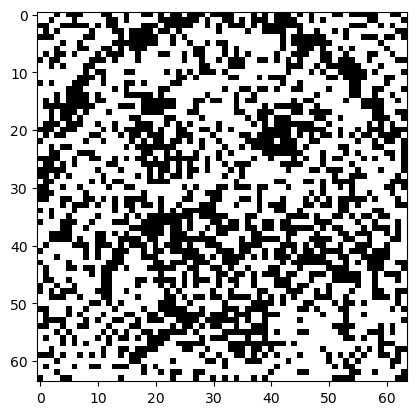

In [16]:
# 3) Initial overlap with two patterns
S[0] = 2*np.round(np.random.uniform(size=N))-1 # clear previous initial condition
nover0 = 400
nover1 = 400
inds_over0 = np.random.choice(N//2, size=nover, replace=False)
inds_over1 = N//2 + np.random.choice(N//2, size=nover, replace=False)
S[0,inds_over0] = P0[inds_over0] # partial overlap (first 800 neurons)
S[0,inds_over1] = P1[inds_over1] # partial overlap (first 800 neurons)



plot_state(S[0])


Text(0, 0.5, 'overlap')

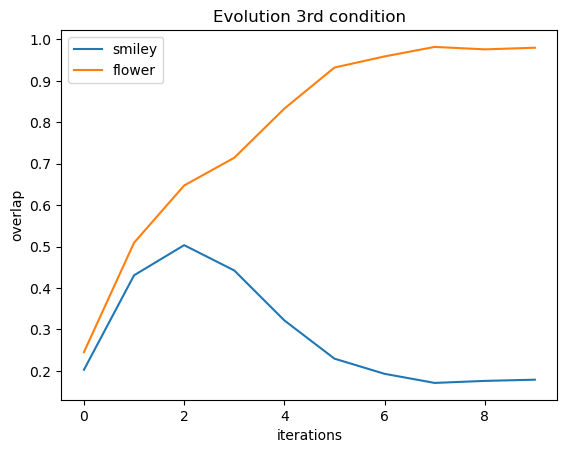

In [17]:
# array with overlap values (two motifs)
m = np.zeros((nt,2))

# initial overlap
m[0,0] = overlap(S[0],P0)
m[0,1] = overlap(S[0],P1)

# loop over times
for i in range(nt-1):
    # calculer les courants
    h = W.dot(S[i])
    # déterminer les probabilités
    p = g(h,beta=5)
    # échantilloner des activités
    is_up = np.random.random(N) < p
    # transformer en +1, -1
    S[i+1] = 2*is_up - 1

    # calculate and store new overlap
    m[i+1,0] = overlap(S[i+1],P0)
    m[i+1,1] = overlap(S[i+1],P1)

# plot overlap over time

fig, ax = plt.subplots()
ax.set_title('Evolution 3rd condition')
ax.plot(np.arange(nt), m[:,0], label='smiley')
ax.plot(np.arange(nt), m[:,1], label='flower')
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('overlap')

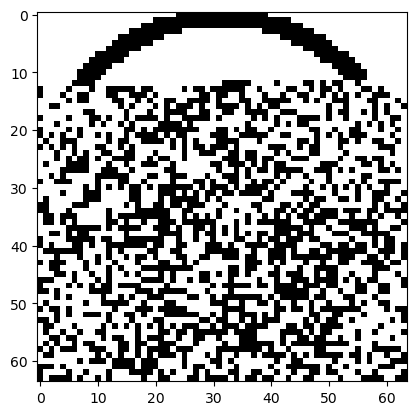

In [18]:
# 4) Initial overlap with two patterns (stealth mode)
S[0] = 2*np.round(np.random.uniform(size=N))-1 # clear previous initial condition
nover0 = 800
nover1 = 1000
inds_over1 = nover0 + np.random.choice(N-nover0, size=nover, replace=False)
S[0,:nover0] = P0[:nover0] # partial overlap (first 800 neurons)
S[0,inds_over1] = P1[inds_over1] # partial overlap (first 800 neurons)

plot_state(S[0])


Text(0, 0.5, 'overlap')

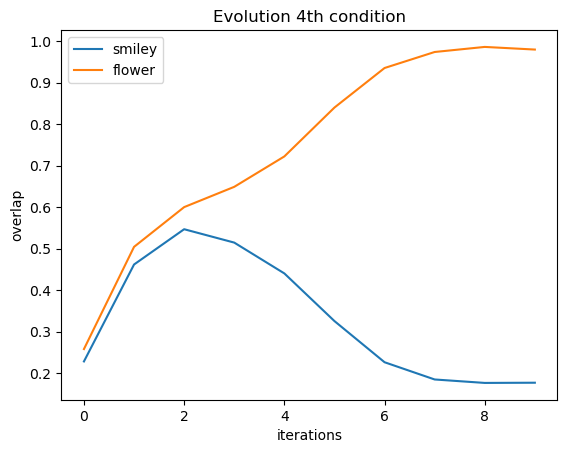

In [19]:
# array with overlap values (two motifs)
m = np.zeros((nt,2))

# initial overlap
m[0,0] = overlap(S[0],P0)
m[0,1] = overlap(S[0],P1)

# loop over times
for i in range(nt-1):
    # calculer les courants
    h = W.dot(S[i])
    # déterminer les probabilités
    p = g(h,beta=5)
    # échantilloner des activités
    is_up = np.random.random(N) < p
    # transformer en +1, -1
    S[i+1] = 2*is_up - 1

    # calculate and store new overlap
    m[i+1,0] = overlap(S[i+1],P0)
    m[i+1,1] = overlap(S[i+1],P1)

# plot overlap over time

fig, ax = plt.subplots()
ax.set_title('Evolution 4th condition')
ax.plot(np.arange(nt), m[:,0], label='smiley')
ax.plot(np.arange(nt), m[:,1], label='flower')
ax.legend()
ax.set_xlabel('iterations')
ax.set_ylabel('overlap')

Pour la condition (3), est-ce que vous observez toujours le même résultat si vous répetez l'itération ? Pour la condition (4), est-ce que le résultat vous a surpris ? Pourquoi ?

In [20]:
# ... réponse écrite ...